# Workshop8 Diabetes
## Emilio and Saffian

In [3]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from time import time
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
#!pip install umap-learn
#import umap

In [4]:
data = pd.read_csv('diabetes.csv')

## EDA

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b6ba62ad0>,
      dtype=object)

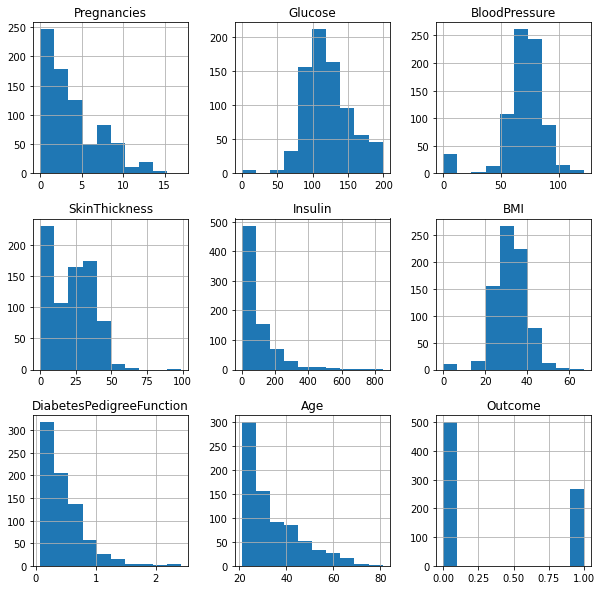

In [10]:
data.hist(figsize = (10,10))

In [11]:
# Possible that 0's are NAN in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
#columns with missing values
na_cols = data.columns[data.isna().any()].tolist()

#Missing values summary
mv = pd.DataFrame(data[na_cols].isna().sum() , columns = ['Number_missing'])
mv['Percentage_missing'] = np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
Glucose,5,0.65
BloodPressure,35,4.56
SkinThickness,227,29.56
Insulin,374,48.70
BMI,11,1.43


[Text(0.5, 1.0, 'Missing Values')]

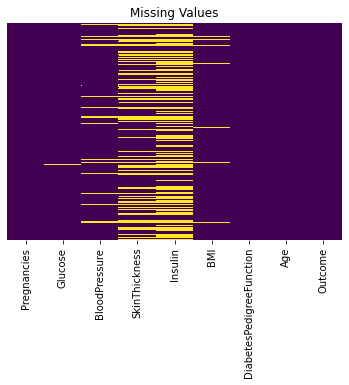

In [13]:
# Gráficos de correlaciones
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values")

In [14]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

[Text(0.5, 1.0, 'Correlations')]

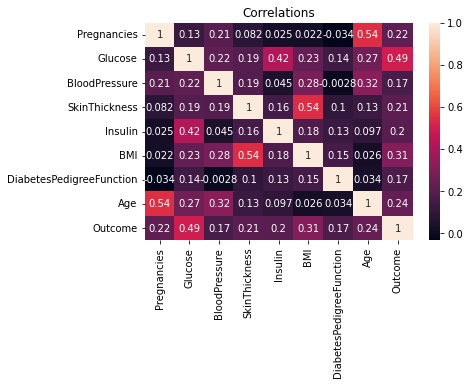

In [15]:
sns.heatmap(data.corr(),annot = True).set(title="Correlations")

## Machine learning

In [16]:
X = data.drop(['Outcome'],axis=1)
y = data['Outcome']

#scaler=StandardScaler()
#X = scaler.fit_transform(X)
#pd.DataFrame(Scaled_X).head()

## KNN

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, shuffle=False)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cross_validate(knn, X_train, y_train, cv=5)["test_score"].mean()

0.7244375216337833

In [19]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# Hyperparameter Grid
opt_k = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

# Instanciate Grid Search
grid = GridSearchCV(model, opt_k, n_jobs=-1,  cv = 5)

# Fit data to Grid Search
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 8}
0.7300103842159917


In [20]:
scores=[]
std=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean())
    std.append(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').std())

Text(0, 0.5, 'Test_score')

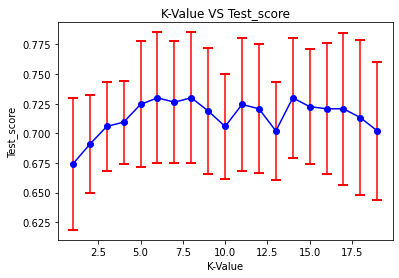

In [21]:
sample_size = range(1,20)
plt.errorbar(sample_size, scores, std, fmt='-o', color='blue', ecolor = 'red', capthick = 2, capsize = 5)

plt.title("K-Value VS Test_score")
plt.xlabel("K-Value")
plt.ylabel("Test_score")

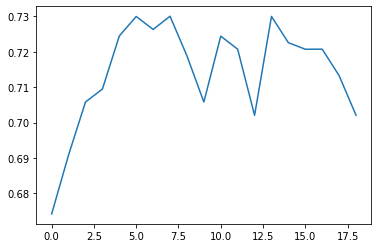

In [22]:
import matplotlib.pyplot as plt
plt.plot(scores);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.779
Precision:  0.719
Recall:  0.582


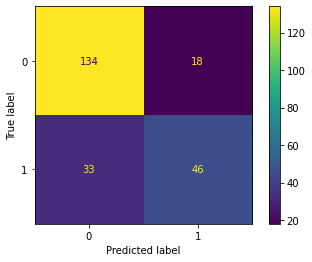

In [23]:
# Not a lot of difference between 6 and 8
from sklearn.metrics import classification_report

Optimize_model = KNeighborsClassifier(n_neighbors=6)
Optimize_model.fit(X_train, y_train)
y_pred = Optimize_model.predict(X_test)

plot_confusion_matrix(Optimize_model, X_test, y_test)

print("Accuracy: ",round(accuracy_score(y_test, y_pred),3))
print("Precision: ",round(precision_score(y_test, y_pred),3))
print("Recall: ",round(recall_score(y_test, y_pred),3))

## Random forest

In [24]:
# Train model with default 
clf = RandomForestClassifier(max_depth=2, random_state=0)
# get cross val scores
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print('scores Mean: ', np.mean(scores))
print('scores std: ', np.std(scores))

scores Mean:  0.7355140186915887
scores std:  0.024598491045968975


In [25]:
# find optimal with grid search

rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7634821737625476
Best Params:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


CV Mean:  0.7560401523018345
std:  0.030445534322513432
Accuracy:  0.788
Precision:  0.759
Recall:  0.557


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


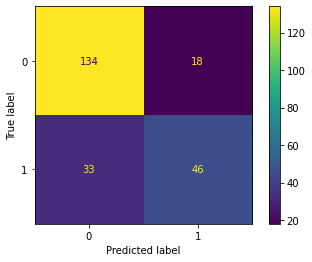

In [26]:
# Train model with default 
clf = RandomForestClassifier(criterion='gini', max_depth=4, max_features='auto', n_estimators = 200)
clf.fit(X_train, y_train)
# get cross val scores
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
y_pred = clf.predict(X_test)

print('CV Mean: ', np.mean(scores))
print('std: ', np.std(scores))

plot_confusion_matrix(Optimize_model, X_test, y_test)

print("Accuracy: ",round(accuracy_score(y_test, y_pred),3))
print("Precision: ",round(precision_score(y_test, y_pred),3))
print("Recall: ",round(recall_score(y_test, y_pred),3))

## SVM

In [27]:
clf = svm.SVC()
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print('Mean: ', round(np.mean(scores),3))
print('std: ', round(np.std(scores),3))

Mean:  0.747
std:  0.026


In [28]:
# Find optimal alpha with grid search

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
 
#grid = RandomizedSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
 
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.750484596746279
Best Params:  {'C': 10, 'gamma': 0.0001}


CV Mean:  0.750484596746279
std:  0.02051051340163183
Accuracy:  0.766
Precision:  0.719
Recall:  0.519


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


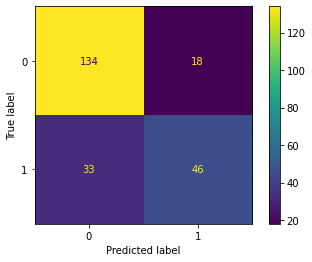

In [30]:
# Train model with default 
clf = svm.SVC(kernel='rbf', C=10, gamma=0.0001)
clf.fit(X_train, y_train)
# get cross val scores
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
y_pred = clf.predict(X_test)

print('CV Mean: ', np.mean(scores))
print('std: ', np.std(scores))

plot_confusion_matrix(Optimize_model, X_test, y_test)

print("Accuracy: ",round(accuracy_score(y_test, y_pred),3))
print("Precision: ",round(precision_score(y_test, y_pred),3))
print("Recall: ",round(recall_score(y_test, y_pred),3))